In [99]:
# Initial imports

In [100]:
import os
import pandas as pd
from dotenv import load_dotenv

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [101]:
# Read your api key environment variable
# YOUR CODE HERE!

from newsapi import NewsApiClient
import nltk

load_dotenv()                           # u need this or the API wont get loaded in
api_key = os.getenv("NEWS_API_KEY")


In [102]:
# Create a newsapi client
# YOUR CODE HERE!

newsapi = NewsApiClient(api_key=api_key)

In [103]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

bitcoin_headlines = newsapi.get_everything(q='bitcoin', language='en')
#bitcoin_headlines
print(f"Total Articles about Bitcoin: {bitcoin_headlines['totalResults']}")

Total Articles about Bitcoin: 3641


In [104]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

ethereum_headlines = newsapi.get_everything(q='ethereum', language='en')
#ethereum_headlines
print(f"Total Articles about Ethereum: {ethereum_headlines['totalResults']}")

Total Articles about Ethereum: 1378


In [105]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

bitcoin_sentiments = []
for article in bitcoin_headlines['articles']:
    try:
        text = article['content']
        date = article['publishedAt']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        bitcoin_sentiments.append({
            'Text': text,
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder Columns
columns = ['Compound', 'Negative', 'Neutral', 'Positive', 'Text']
bitcoin_df = bitcoin_df[columns]
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.6908,0.16,0.840,0.000,Two alleged crypto traders in Singapore appare...
1,0.0000,0.00,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ..."
2,0.2732,0.00,0.937,0.063,“The COVID-19 pandemic has resulted in a mass ...
3,0.0000,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."
4,0.0000,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."


In [106]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!

ethereum_sentiments = []
for article in ethereum_headlines['articles']:
    try:
        text = article['content']
        date = article['publishedAt']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        ethereum_sentiments.append({
            'Text': text,
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu
        })
        
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder Columns
columns = ['Compound', 'Negative', 'Neutral', 'Positive', 'Text']
ethereum_df = ethereum_df[columns]
ethereum_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.7506,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...
1,0.0000,0.0,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...
2,0.0000,0.0,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion..."
3,0.7579,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...
4,0.0000,0.0,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...


In [107]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.371550,0.008000,0.915950,0.076050
std,0.320603,0.035777,0.046388,0.046397
min,-0.690800,0.000000,0.802000,0.000000
25%,0.448550,0.000000,0.910000,0.083250
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.000000,0.910000,0.090000
max,0.750600,0.160000,1.000000,0.198000


In [108]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,16.000000,16.000000,16.000000,16.000000
mean,0.190694,0.015688,0.921312,0.063062
std,0.298172,0.034763,0.085886,0.070121
min,-0.267700,0.000000,0.747000,0.000000
25%,0.000000,0.000000,0.871000,0.000000
50%,0.000000,0.000000,0.931000,0.053500
75%,0.401900,0.000000,1.000000,0.097250
max,0.757900,0.110000,1.000000,0.209000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the higher positive mean score of .0760 vs. Ether at .0630

Q: Which coin had the highest compound score?

A: Bitcoin had the higher compound score of 0.3715 vs. 0.1906 for Ether

Q. Which coin had the highest positive score?

A: Ether had the highest max positive score of .2090 vs. .1980 for Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [109]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [110]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [111]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Tokenize clean version of words
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens


In [112]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!

bitcoin_tokens = bitcoin_df.copy()
tokenized = []
for i in bitcoin_tokens['Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens':tokenized_articles})

bitcoin_tokens_df= pd.DataFrame(tokenized)
bitcoin_tokens['Tokens'] = bitcoin_tokens_df 


bitcoin_tokens.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.6908,0.16,0.840,0.000,Two alleged crypto traders in Singapore appare...,"[two, alleged, crypto, trader, singapore, appa..."
1,0.0000,0.00,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...","[alexis, akwagyiram, tom, wilson, monthly, cry..."
2,0.2732,0.00,0.937,0.063,“The COVID-19 pandemic has resulted in a mass ...,"[covid, pandemic, ha, resulted, mass, shift, w..."
3,0.0000,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[lagoslondon, reuters, four, month, ago, abola..."
4,0.0000,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[lagoslondon, reuters, four, month, ago, abola..."


In [113]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!

ether_tokens = ethereum_df.copy()
tokenized = []
for i in ether_tokens['Text']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens':tokenized_articles})

ether_tokens_df= pd.DataFrame(tokenized)
ether_tokens['Tokens'] = ether_tokens_df 
  
ether_tokens.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.7506,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...,"[youve, interacted, cryptocurrencies, past, co..."
1,0.0000,0.0,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...,"[tldr, complete, stock, cryptocurrency, invest..."
2,0.0000,0.0,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion...","[september, min, readopinions, expressed, entr..."
3,0.7579,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...,"[london, reuters, sound, like, surefire, bet, ..."
4,0.0000,0.0,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...,"[new, york, reuters, brooklynbased, technology..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [114]:
from collections import Counter
from nltk import ngrams

In [115]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

bitcoin_words = []
for text in bitcoin_tokens['Tokens']:
    for word in text:
        bitcoin_words.append(word)
bitcoin_count = Counter(ngrams(bitcoin_words, n=2), ascending=True)
bitcoin_count.most_common(20)

[(('satoshi', 'nakaboto'), 28),
 (('char', 'robot'), 14),
 (('robot', 'colleague'), 14),
 (('colleague', 'satoshi'), 14),
 (('nakaboto', 'writes'), 14),
 (('writes', 'bitcoin'), 14),
 (('every', 'fucking'), 14),
 (('fucking', 'daywelcome'), 14),
 (('daywelcome', 'another'), 14),
 (('another', 'edition'), 14),
 (('edition', 'bitcoin'), 14),
 (('bitcoin', 'today'), 14),
 (('today', 'satoshi'), 14),
 (('nakaboto', 'tell'), 14),
 (('tell', 'whats'), 14),
 (('whats', 'going'), 14),
 (('going', 'bitcoin'), 14),
 (('bitcoin', 'char'), 14),
 (('bitcoin', 'btc'), 11),
 (('btc', 'every'), 11)]

In [116]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

ether_words = []
for text in ether_tokens['Tokens']:
    for word in text:
        ether_words.append(word)
ether_count = Counter(ngrams(ether_words, n=2), ascending=True)
ether_count.most_common(20)

[(('char', 'tldr'), 2),
 (('char', 'september'), 2),
 (('september', 'min'), 2),
 (('min', 'readopinions'), 2),
 (('readopinions', 'expressed'), 2),
 (('expressed', 'entrepreneur'), 2),
 (('entrepreneur', 'contributor'), 2),
 (('satoshi', 'nakaboto'), 2),
 (('char', 'ethereum'), 2),
 (('decentralized', 'exchange'), 2),
 (('photo', 'illustration'), 2),
 (('imageslightrocket', 'via'), 2),
 (('via', 'getty'), 2),
 (('price', 'bitcoin'), 2),
 (('youve', 'interacted'), 1),
 (('interacted', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'past'), 1),
 (('past', 'couple'), 1),
 (('couple', 'year'), 1),
 (('year', 'good'), 1)]

In [117]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [118]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!

token_count(bitcoin_words)

[('bitcoin', 43),
 ('satoshi', 28),
 ('nakaboto', 28),
 ('char', 20),
 ('robot', 14),
 ('colleague', 14),
 ('writes', 14),
 ('every', 14),
 ('fucking', 14),
 ('daywelcome', 14)]

In [119]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!

token_count(ether_words)

[('char', 16),
 ('bitcoin', 8),
 ('ethereum', 7),
 ('cryptocurrency', 6),
 ('ha', 4),
 ('used', 3),
 ('september', 3),
 ('price', 3),
 ('decentralized', 3),
 ('exchange', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [120]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

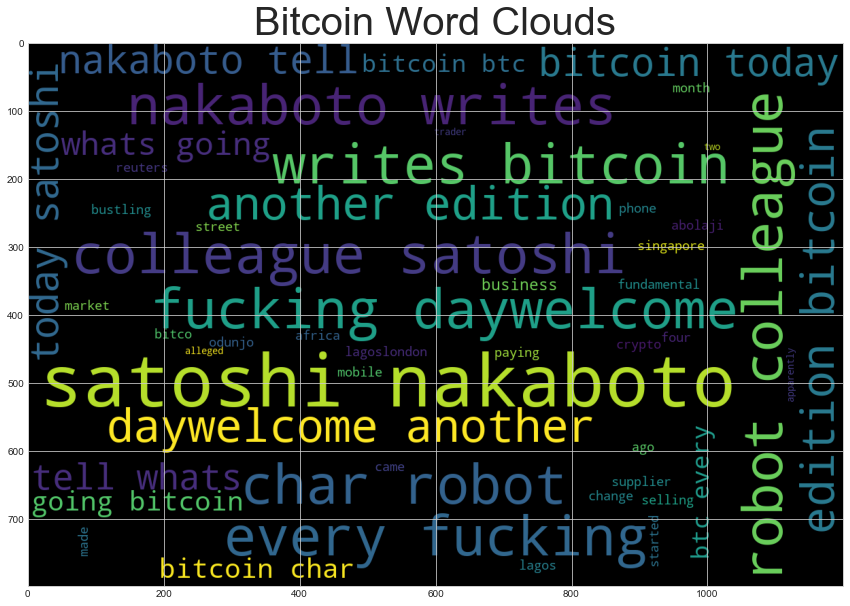

In [121]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!


#Set the function
def process_text(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    return big_string
bitcoin_word_cloud = process_text(bitcoin_words)
ether_word_cloud = process_text(ether_words)

wc = WordCloud(colormap="RdYlBu").generate(bitcoin_word_cloud)
plt.imshow(wc)
wc = WordCloud(width=1200, height=800, max_words = 50).generate(bitcoin_word_cloud)
plt.title("Bitcoin Word Clouds", fontsize=40)
plt.imshow(wc)

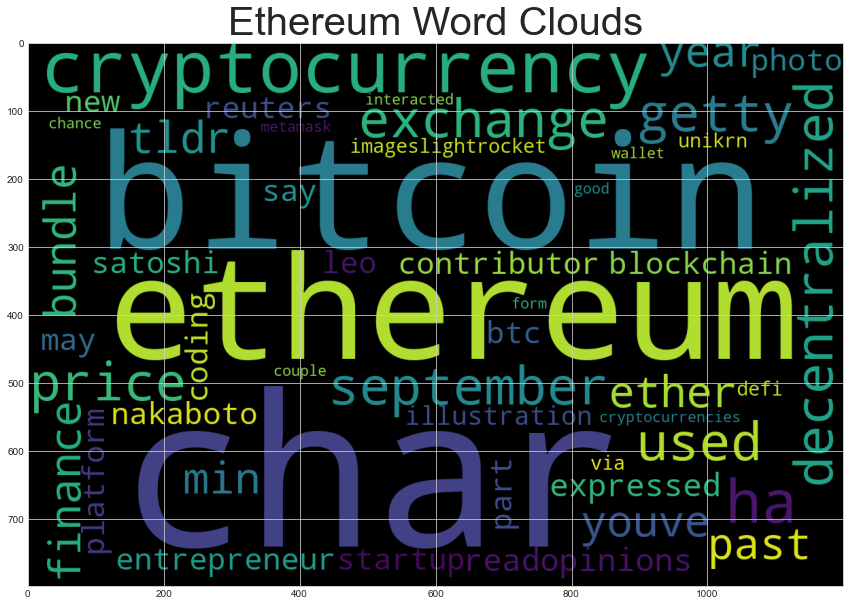

In [122]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!

wc = WordCloud().generate(ether_word_cloud)
plt.imshow(wc)
wc = WordCloud(width=1200, height=800, max_words = 50).generate(ether_word_cloud)
plt.title("Ethereum Word Clouds", fontsize=40)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [123]:
import spacy
from spacy import displacy

In [124]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [125]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [126]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!

bitcoin_words = []
for sent in bitcoin_tokens['Text']:
    sent_list = sent
    bitcoin_words.append(sent_list)
bit_string = ''.join(bitcoin_words)             #
#all_bit_string
# Run the NER processor on all of the text
bitcoin_ner = nlp(bit_string)
# Add a title to the document
bitcoin_ner.user_data['title'] = "Bitcoin NER"
# Render the visualization
displacy.render(bitcoin_ner, style='ent')

In [127]:
# List all Entities
# YOUR CODE HERE!


for entities in bitcoin_ner.ents:
    print(entities, entities.label_)

Two CARDINAL
Singapore GPE
365,000 Singapore dollars MONEY
bitcoin GPE
Alexis Akwagyiram PERSON
Tom Wilson PERSON
Monthly DATE
Africa LOC
55% PERCENT
a year DATE
Nigeria GPE
South Africa GPE
Kenya GPE
VPN PRODUCT
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
LONDON GPE
Reuters ORG
Four months ago DATE
Abolaji Odunjo ORG
Lagos GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Blockfolio GPE
FTX ORG
$150 million MONEY
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
To

---

## Ethereum NER

In [128]:
# Concatenate all of the ethereum text together
# YOUR CODE HERE!

ether_words = []
for sent in ether_tokens['Text']:
    sent_list = sent
    ether_words.append(sent_list)
ether_string = ''.join(ether_words)
#all_bit_string
# Run the NER processor on all of the text
ether_ner = nlp(ether_string)
# Add a title to the document
ether_ner.user_data['title'] = "Ether NER"
# Render the visualization
displacy.render(ether_ner, style='ent')

In [129]:
# List all Entities
# YOUR CODE HERE!

for entities in ether_ner.ents:
    print(entities, entities.label_)

the past couple of years DATE
The Complete Stock and Cryptocurrency Investment Toolkit Bundle ORG
29.46 MONEY
Sept. 7 DATE
97% PERCENT
18, 2020 DATE
6 min QUANTITY
five years ago DATE
Ethereum ORG
ETH ORG
Reuters ORG
about 20% PERCENT
YORK PERSON
Reuters ORG
Brooklyn GPE
ConsenSys ORG
JPMorgan Chase &amp ORG
Quorum PRODUCT
Tuesday DATE
Bitcoin GPE
BTC ORG
two CARDINAL
UNUS SED LEO ORG
LEO ORG
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
second ORDINAL
one CARDINAL
bitcoin GPE
more than 10% PERCENT
24-hour TIME
chars]$100 million MONEY
Deloitte ORG
KPMG ORG
Fidelity ORG
$100 milli MONEY
Uniswap ORG
400 CARDINAL
UNI ORG
September 1 DATE
Ethereum ORG
Mateusz Slodkowski/ PERSON
twenty dollars MONEY
May DATE
bitcoin GPE
DeFi LOC
DeFi LOC
Bitcoin GPE
Bitcoin GPE
as high as $12,086 MONEY
Ethereum (ETH ORG
chars]The Securities and Exchange Commission ORG
Unikrn ORG
Unikrn ORG
UnikoinGold ORG
16, 2020 DATE
6 min QUANTITY
the past few months DATE
wo